# Initialize things

In [152]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [153]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Daed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [154]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



# sentences and grammars: chunking


In [155]:
# Some possible grammars to create parse tree
# grammar=" " #empty grammar
# grammar = "NP: {<JJ><NN>}"
# grammar = "NP: {<DT>?<JJ>*<NN>}"

grammar = r"""
    NP: {<VBG><NNS>}  # Chunk gerund (VBG) followed by plural noun (NNS)
    VP: {<MD><VB><JJ>}         # Chunk modal verb (MD), verb (VB), and adjective (JJ)
"""

parser = nltk.RegexpParser(grammar)

In [156]:
# Menu of sentences to be tagged #
# sentence="See Spot run."
# sentence="The quick brown fox jumped over the lazy dog."
#sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
# sentence='They can fish.'
sentence='Flying planes can be dangerous'
print(sentence)

Flying planes can be dangerous


In [157]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['Flying', 'planes', 'can', 'be', 'dangerous']
POS tags are [('Flying', 'VBG'), ('planes', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('dangerous', 'JJ')]


In [158]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S (NP Flying/VBG planes/NNS) (VP can/MD be/VB dangerous/JJ))


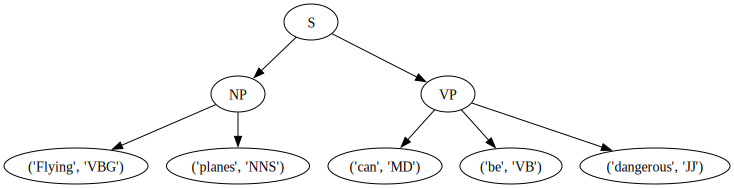

In [159]:
dot_source = to_graphviz(tree)
display(dot_source)

# Adjusting "Flying planes can be dangerous"

With manual part-of-speech tagging changes.

In [160]:
# prompt: replace ('Flying', 'VBG') with  ('brown', 'NN") in tagged
# prompt: replace ('planes', 'NNS') with  ('brown', 'NN") in tagged
# prompt: replace ('can', 'MD') with  ('can', 'VB") in tagged
for i, (word, tag) in enumerate(tagged):
  if word == 'Flying' and tag == 'VBG':
    tagged[i] = ('Flying', 'NN')
  if word == 'planes' and tag == 'NNS':
    tagged[i] = ('planes', 'NN')
  if word == 'can' and tag == 'MD':
    tagged[i] = ('can', 'VB')

print(tagged)


[('Flying', 'NN'), ('planes', 'NN'), ('can', 'VB'), ('be', 'VB'), ('dangerous', 'JJ')]


In [161]:
tree = parser.parse(tagged)
print(tree)

(S Flying/NN planes/NN can/VB be/VB dangerous/JJ)


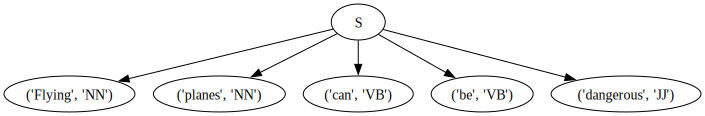

In [162]:
dot_source = to_graphviz(tree)
display(dot_source)

# Adjusting "They can fish."
We want to adjust the tagging so that we get the meaning of "a group of people who put fish into cans."

In [163]:
# prompt: In tagged replace the POS for "can" to be a verb and the POS for "fish" to be a noun

for i, (word, tag) in enumerate(tagged):
  if word == 'can' and tag == 'MD':
    tagged[i] = ('can', 'VB')
  if word == 'fish' and tag == 'VB':
    tagged[i] = ('fish', 'NN')

print(tagged)


[('Flying', 'NN'), ('planes', 'NN'), ('can', 'VB'), ('be', 'VB'), ('dangerous', 'JJ')]


In [164]:
#  Create tree
tree = parser.parse(tagged)
print(tree)

(S Flying/NN planes/NN can/VB be/VB dangerous/JJ)


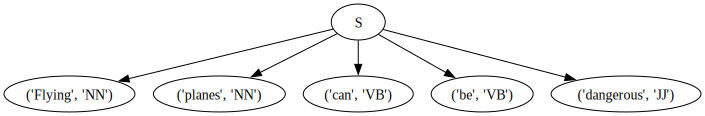

In [165]:
dot_source = to_graphviz(tree)
display(dot_source)

# Context Free Grammars

In [166]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [167]:
groucho_grammar

<Grammar with 13 productions>

In [168]:
type(groucho_grammar)

nltk.grammar.CFG

In [169]:
groucho_grammar.start()

S

In [170]:
groucho_grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [171]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [172]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [173]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [174]:
pp[0].lhs()

NP

In [175]:
pp[0].rhs()

(Det, N)

In [176]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [177]:
print(trees[0])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


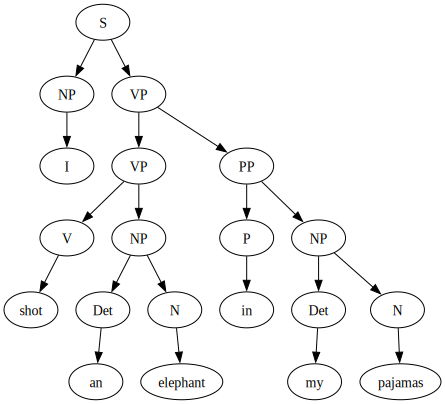

In [178]:
dot_source = to_graphviz(trees[0])
display(dot_source)

In [179]:
print(trees[1])

(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


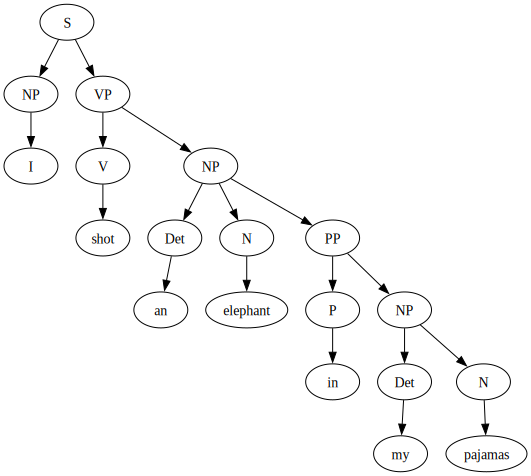

In [180]:
dot_source = to_graphviz(trees[1])
display(dot_source)